# Diagnosis of COVID-19 and its clinical spectrum (DATA PREPROCESSING)

# Project Overview

  >The World Health Organization (WHO) characterized the COVID-19, caused by the SARS-CoV-2, as a pandemic on March 11, while the exponential increase in the number of cases was risking to overwhelm health systems around the world with a demand for ICU beds far above the existing capacity, with regions of Italy being prominent examples.

  >Brazil recorded the first case of SARS-CoV-2 on February 26, and the virus transmission evolved from imported cases only, to local and finally community transmission very rapidly, with the federal government declaring nationwide community transmission on March 20.

  >Until March 27, the state of São Paulo had recorded 1,223 confirmed cases of COVID-19, with 68 related deaths, while the county of São Paulo, with a population of approximately 12 million people and where Hospital Israelita Albert Einstein is located, had 477 confirmed cases and 30 associated death, as of March 23. Both the state and the county of São Paulo decided to establish quarantine and social distancing measures, that will be enforced at least until early April, in an effort to slow the virus spread.

  >One of the motivations for this challenge is the fact that in the context of an overwhelmed health system with the possible limitation to perform tests for the detection of SARS-CoV-2, testing every case would be impractical and tests results could be delayed even if only a target subpopulation would be tested.

## Objective

> Predict confirmed COVID-19 cases among suspected cases.
Based on the results of laboratory tests commonly collected for a suspected COVID-19 case during a visit to the emergency room, would it be possible to predict the test result for SARS-Cov-2 (positive/negative)?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE=42

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "dataset.xlsx"

data = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "einsteindata4u/covid19",
  file_path,
)

df = data.copy()

/tmp/ipython-input-3464446082.py:6: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  data = kagglehub.load_dataset(


100%|██████████| 568k/568k [00:00<00:00, 4.61MB/s]


# **DATA PREPROCESSING**

In [ ]:
missing_rate = df.isna().sum()/df.shape[0]

blood_columns = list(df.columns[(missing_rate > 0.88) & (missing_rate < 0.9)])
viral_columns = list(df.columns[(missing_rate > 0.75) & (missing_rate < 0.80)])

key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

df = df[key_columns + blood_columns + viral_columns]

## Train/Test

In [ ]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state=RANDOM_STATE)

In [ ]:
display(trainset['SARS-Cov-2 exam result'].value_counts(normalize=True))
display(testset['SARS-Cov-2 exam result'].value_counts(normalize=True))

,proportion
SARS-Cov-2 exam result,
negative,0.900332
positive,0.099668


,proportion
SARS-Cov-2 exam result,
negative,0.90434
positive,0.09566


## Data modeling

In [ ]:
def encoding(df):
  code = {
    'positive' : 1,
    'negative' : 0,
    'detected' : 1,
    'not_detected' : 0
    }

  for col in df.select_dtypes('object'):
    df[col] = df[col].map(code)

  return df

In [ ]:
def imputation(df):
  # df = df.fillna(0)
  df = df.dropna(axis=0)
  return df

In [ ]:
def feature_engineering(df):
  df['sick'] = df[viral_columns].sum(axis=1)
  df = df.drop(columns=viral_columns)
  return df

In [ ]:
def preprocessing(df):
  """perform preprocessing"""
  df = encoding(df)
  df = imputation(df)
  df = feature_engineering(df)

  X = df.drop("SARS-Cov-2 exam result", axis=1)
  y = df['SARS-Cov-2 exam result']

  return X, y

In [ ]:
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

In [ ]:
X_train

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
4769,17,0.602732,0.917499,-1.183189,-0.101517,0.472242,0.062494,1.339507,-0.347844,-0.834685,0.648619,-0.709090,0.066045,0.515126,-0.890442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1255,18,1.037616,1.544059,-1.220874,1.020415,1.177456,-1.378914,2.036555,1.402532,-0.223767,0.439533,-0.793368,-0.514813,-0.719245,-0.448160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
291,16,0.831618,0.541564,-0.705840,-0.999063,1.106935,-0.645416,-0.851210,-0.275492,-0.223767,-1.024072,-0.709090,-0.715108,0.462600,0.524862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4230,1,-1.823456,-2.027332,-0.881705,1.020415,-1.590510,-0.926875,-1.548258,2.379292,-1.140144,-0.814985,-0.835508,-0.154280,1.355549,0.082579,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4437,17,-0.724805,-0.711556,0.663397,0.122869,-1.149751,0.497476,-0.154166,-0.169746,0.387152,0.962249,0.344395,1.167670,-0.272770,-0.271247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,11,0.923173,1.105468,0.072992,-1.223449,0.754327,-0.210435,0.841616,1.992484,-0.223767,0.439533,-0.203417,0.086074,-0.088928,-1.244268,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
391,7,0.579844,0.290940,-0.077750,-1.223449,-0.021409,0.147785,-0.950790,-0.230967,-0.223767,0.491805,-0.666950,1.067522,-0.193981,-0.890442,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,17,0.808730,1.042812,-0.278739,1.581381,0.701437,-0.261609,1.040773,0.000005,0.387152,0.439533,0.049419,-0.014074,-0.509139,-0.094334,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1899,10,0.991838,0.666876,-0.454604,-0.213711,0.860109,-0.952462,-0.950790,0.247673,0.692611,-0.449085,-0.456253,-0.014074,-0.798034,-0.713529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train.value_counts()

,count
SARS-Cov-2 exam result,
0,255
1,40


In [ ]:
X_test

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
4290,19,-0.015259,-0.335620,2.999894,-0.325903,-0.462168,-0.159261,-1.249524,2.852366,-1.140144,0.230447,1.271461,0.927315,1.355549,-0.801985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177,16,-0.701917,-0.460932,0.437284,-0.662483,-0.814774,0.668057,0.841616,-0.489767,0.387152,0.753163,-0.371974,0.386517,0.462600,0.967144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
381,11,0.007630,-0.210308,0.123239,-1.223449,-0.091930,-0.926875,-0.851210,0.826494,-1.140144,-0.239998,0.007280,0.146163,-0.482876,0.524862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5165,14,0.740064,1.042812,-1.245998,0.010677,0.860109,-1.012165,1.239930,-1.085284,-1.140144,0.178175,-0.835508,-0.434694,-0.745508,0.082579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
465,10,0.442512,0.290940,-0.555098,-1.111256,-0.409276,-0.261609,-0.452899,-0.695693,-0.529226,1.275878,-0.371974,1.708467,2.353550,0.259492,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1562,13,0.740064,0.604220,-0.040064,-0.325903,0.895370,0.804521,-0.353319,-0.985104,1.608988,-0.605899,0.470813,-0.494784,-0.377823,0.171035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1717,12,-1.663236,-1.526084,-0.894267,0.347255,-1.713922,1.418612,0.144572,-0.517595,0.998070,0.544077,0.386534,0.546754,0.462600,-0.094334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1894,13,-0.450142,-0.460932,0.977442,-1.672222,-0.656101,-0.210435,-0.154166,0.005570,-0.529226,0.387261,-0.119138,0.526723,-0.614192,-0.625073,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,3,0.053407,0.290940,0.927195,-1.223449,0.225417,1.085980,0.941197,0.036181,0.081693,0.073631,-0.203417,-0.414665,0.068652,-0.448160,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_test.value_counts()

,count
SARS-Cov-2 exam result,
0,57
1,10


## Modelisation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
dtree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

## Evaluation (with MLFlow Experiment Tracking)

In [ ]:
def evaluation(model, X_train, y_train, X_test, y_test):
    # Train
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)

    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Learning curve
    N, train_score, val_score = learning_curve(
        model,
        X_train,
        y_train,
        cv=5,
        scoring='f1',
        train_sizes=np.linspace(0.1, 1, 10)
    )

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(N, train_score.mean(axis=1), label='train score')
    ax.plot(N, val_score.mean(axis=1), label='validation score')
    ax.set_xlabel('Training size')
    ax.set_ylabel('F1 score')
    ax.legend()

    return {
        'f1_score': f1,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'learning_curve_figure': fig
    }

In [ ]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.9/753.9 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import learning_curve
import mlflow
import mlflow.sklearn

mlflow.set_tracking_uri("/content/drive/MyDrive/mlruns")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mlflow.set_experiment("COVID-19_modelling")

/usr/local/lib/python3.12/dist-packages/mlflow/tracking/_tracking_service/utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)


<Experiment: artifact_location='/content/drive/MyDrive/mlruns/821035048220634312', creation_time=1762785356907, experiment_id='821035048220634312', last_update_time=1762785356907, lifecycle_stage='active', name='COVID-19_modelling', tags={}>

Confusion Matrix:
 [[57  0]
 [ 4  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        57
           1       1.00      0.60      0.75        10

    accuracy                           0.94        67
   macro avg       0.97      0.80      0.86        67
weighted avg       0.94      0.94      0.93        67



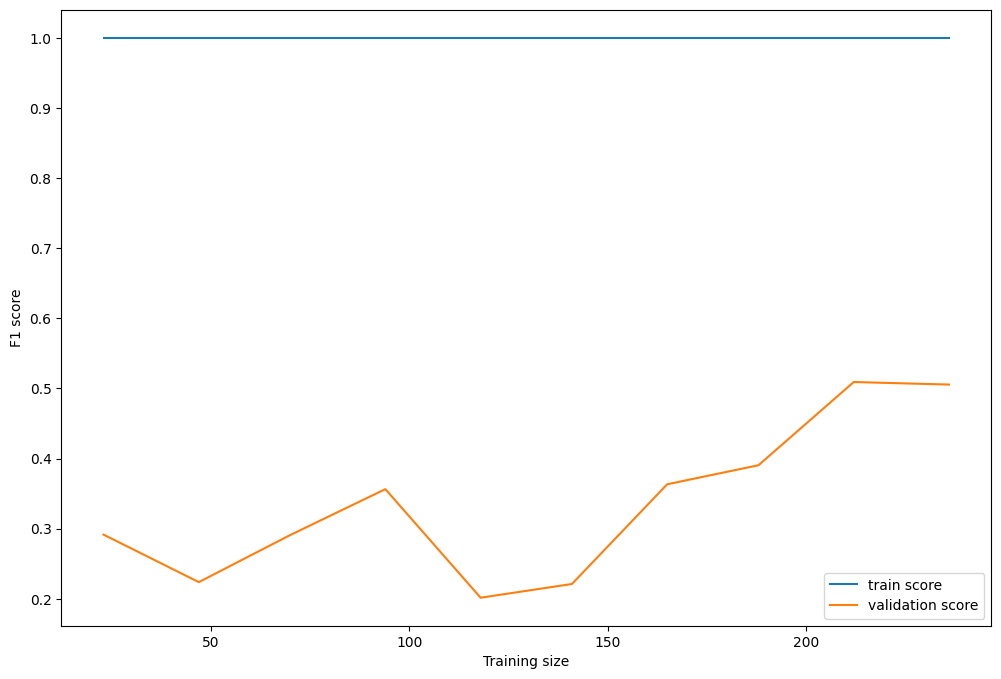

In [ ]:
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)
with mlflow.start_run():
    # results = evaluation(dtree, X_train, y_train, X_test, y_test)
    results = evaluation(rf, X_train, y_train, X_test, y_test)

    metrics = {k: results[k] for k in ['f1_score', 'accuracy', 'precision', 'recall']}
    # mlflow.log_metrics(metrics)

    # mlflow.sklearn.log_model(rf, "model")

    # Log learning curve plot
    fig = results['learning_curve_figure']
    # fig.savefig("learning_curve.png")
    # mlflow.log_artifact("learning_curve.png")
    display(fig)
    plt.close(fig)